# Итоговый проект: fashion-MNIST

**В качестве итогового проекта предлагается решить задачу классификации на наборе данных Fashion-MNIST, который доступен по ссылке:**

- https://www.kaggle.com/zalando-research/fashionmnist

**Fashion-MNIST – это датасет состоящий из 70000 черно-белых изображений одежды 28х28 пикселей каждое. 60000 из них содержатся в тренировочной выборке, и 10000 – в тестовой. Этот набор данных представляет из себя альтернативу обычному датасету рукописных цифр MNIST.**

**Данный проект является учебным и его цель – научиться работать с различными моделями машинного обучения. Необязательно строить самую лучшую модель и получать лучшее качество на тестовых данных. Самое важное – это научиться обучать модели и анализировать полученные результаты. В результате, вы научитесь использовать и подготавливать данные для решения задачи классификации. Так же вы изучите на практике различные алгоритмы машиного обучения, такие как логистическая регрессия, полносвязные нейронные сети и сверточные нейронные сети.**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

from sklearn import neighbors, metrics

import tensorflow as tf

**Загрузим данные, нормализуем `x_train` и `x_test` путем деления числового значения каждого пикселя на 255, представим `y_train` и `y_test` в виде one-hot вектора с помощью `tf.keras.utils.to_categorical`:**

In [3]:
data_train = pd.read_csv('drive/My Drive/coursera/fashion-mnist_train.csv') 
#data_train = pd.read_csv('fashion-mnist_train.csv') 
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
x_train = data_train.drop('label', axis=1).values
y_train = data_train.label.values

In [5]:
data_test = pd.read_csv('drive/My Drive/coursera/fashion-mnist_test.csv') 
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
x_test = data_test.drop('label', axis=1).values
y_test = data_test.label.values

In [0]:
labels = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

Text(0.5, 1.0, 'T-shirt/top')

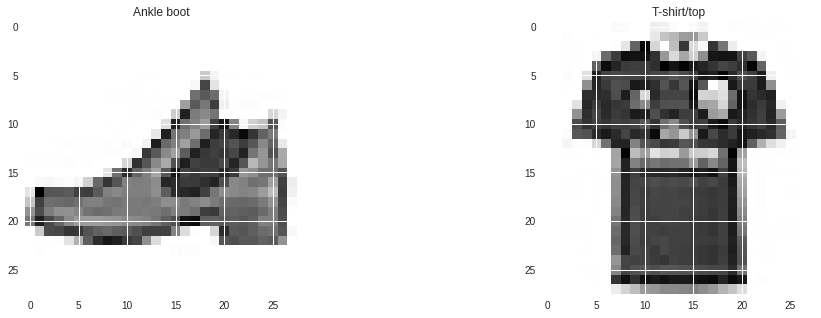

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 5))
axes[0].imshow(x_train[1].reshape(28, 28))
axes[0].set_title(labels[y_train[1]])
axes[1].imshow(x_test[0].reshape(28, 28))
axes[1].set_title(labels[y_test[0]])

In [0]:
x_train = x_train.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train)
x_test = x_test.astype('float32') / 255
y_test = tf.keras.utils.to_categorical(y_test)

In [0]:
# general parameters
input_shape = x_train.shape[1]
number_objects = y_train.shape[0]
number_classes = y_train.shape[1]

lr = 0.1 # learning_rate
epochs = 30
batch_size = 128

In [0]:
def plot_results(accuracy_train, accuracy_test, loss_train, loss_test):
  
  fig, axes = plt.subplots(ncols=2, figsize=(20, 5))

  axes[0].plot(range(epochs), accuracy_train, 'bo-', label='обучение')
  axes[0].plot(range(epochs), accuracy_test, 'rs-', label='тест')
  axes[0].set_ylabel('Доля верных ответов (accuracy)')
  axes[0].set_xlabel('Эпоха')
  axes[0].legend()

  axes[1].plot(range(epochs), loss_train, 'bo-', label='обучение')
  axes[1].plot(range(epochs), loss_test, 'rs-', label='тест')
  axes[1].set_ylabel('Функция потерь (loss)')
  axes[1].set_xlabel('Эпоха')
  axes[1].legend()

## Логистическая регрессия

**Логистическая регрессия может быть реализована как нейронная сеть без скрытых слоев.**

**В качестве алгоритма оптимизации используется стохастический градиентный спуск. В выходном слое количество нейронов равно количеству классов, функция активации выходного слоя - `softmax`.**

**Обучите логистическую регрессию на обучающей выборке и оцените качество на тестовой выборке используя метрику `accuracy`. Постройте графики качества модели на обучении и на тесте в зависимости от количества эпох.** 

#### Tensorflow

In [12]:
tf.reset_default_graph()
tf.random.set_random_seed(0)

X = tf.placeholder(dtype=tf.float32, shape=[None, input_shape])
y = tf.placeholder(dtype=tf.float32, shape=[None, number_classes])

weights = tf.Variable(tf.random_normal(shape=[input_shape, number_classes]))
biases = tf.Variable(tf.random_normal(shape=[number_classes]))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
logits = tf.add(tf.matmul(X, weights), biases)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y))

predictions = tf.nn.softmax(logits)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(predictions, axis=1), tf.argmax(y, axis=1)), dtype=tf.float32))

train_ = tf.train.GradientDescentOptimizer(lr).minimize(loss)

In [14]:
init = tf.global_variables_initializer()

loss_train, loss_test = [], []
accuracy_train, accuracy_test = [], []

s = tf.Session()

with tf.Session() as s:

    s.run(init)

    for epoch in range(epochs):

        for batch in range(number_objects // batch_size):
            x_batch, y_batch = x_train[batch*batch_size:(batch+1)*batch_size],\
            y_train[batch*batch_size:(batch+1)*batch_size]
            
            s.run(train_, feed_dict={X: x_batch, y: y_batch})
    
        l_train, a_train = s.run([loss, accuracy], feed_dict={X: x_train, y: y_train})
        loss_train.append(l_train)
        accuracy_train.append(a_train)
    
        l_test, a_test = s.run([loss, accuracy], feed_dict={X: x_test, y: y_test})
        loss_test.append(l_test)
        accuracy_test.append(a_test)  

    print('Итоговая доля верных ответов на тесте: {:.2f}%'.format(s.run(accuracy, feed_dict={X: x_test, y: y_test})*100))    

Итоговая доля верных ответов на тесте: 81.84%


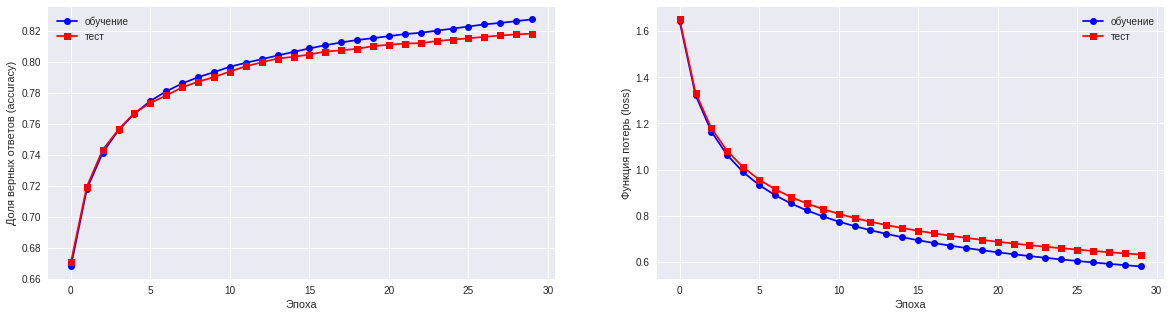

In [15]:
plot_results(accuracy_train, accuracy_test, loss_train, loss_test)

#### Keras

In [0]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(number_classes, input_shape=(input_shape,), activation='softmax'))

In [0]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(lr), metrics=['accuracy'])

In [18]:
log = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.


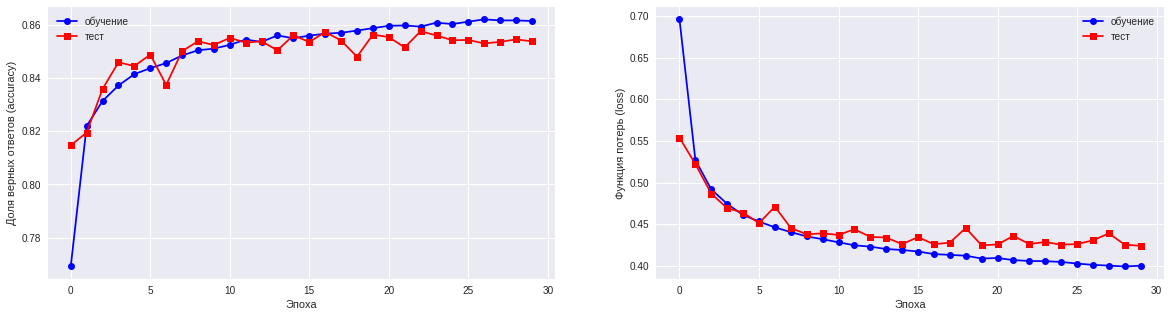

In [19]:
plot_results(log.history['acc'], log.history['val_acc'], log.history['loss'], log.history['val_loss'])

In [20]:
print('Итоговая доля верных ответов на тесте: {:.2f}%'.format(model.evaluate(x_test, y_test, verbose=0)[1]*100))

model.summary()

Итоговая доля верных ответов на тесте: 85.38%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Полносвязная нейронная сеть

**В этой части задания необходимо реализовать полносвязную нейронную сеть, которая будет состоять из нескольких скрытых слоев с количеством нейронов равным 256 и функцией активации ReLU. Количество нейронов в выходном слое равно количеству классов; функция активации - `softmax`, функция потерь - `softmax_cross_entropy_with_logits` для реализации Tensorflow, `categorical_crossentropy` для реализации Keras, оптимизатор - `Adam` для реализации Tensorflow, `Adadelta` для реализации Keras (документация Keras рекомендует оставлять параметры по умолчанию), метрика - `accuracy`.**

#### Tensorflow

In [0]:
tf.reset_default_graph()
tf.random.set_random_seed(0)

n_hidden_1 = 256
n_hidden_2 = 256

X = tf.placeholder(dtype=tf.float32, shape=[None, input_shape])
y = tf.placeholder(dtype=tf.float32, shape=[None, number_classes])

In [0]:
weights = {
    'w1': tf.Variable(tf.random_normal([input_shape, n_hidden_1])),
    'w2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'output': tf.Variable(tf.random_normal([n_hidden_2, number_classes])),
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'output': tf.Variable(tf.random_normal([number_classes])),
}

In [0]:
def fc_network(X):
    
    layer_1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    output_layer = tf.add(tf.matmul(layer_1, weights['output']), biases['output'])
    
    return output_layer

In [0]:
logits = fc_network(X)

loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y)
)

predictions = tf.nn.softmax(logits)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(predictions, axis=1), tf.argmax(y, axis=1)), dtype=tf.float32))

train_ = tf.train.AdamOptimizer().minimize(loss)

In [39]:
init = tf.global_variables_initializer()

loss_train, loss_test = [], []
accuracy_train, accuracy_test = [], []

with tf.Session() as s:
  
    s.run(init)
    
    for epoch in range(epochs):
        
        for batch in range(number_objects // batch_size):
            x_batch, y_batch = x_train[batch*batch_size:(batch+1)*batch_size],\
            y_train[batch*batch_size:(batch+1)*batch_size]
            
            s.run(train_, feed_dict={X: x_batch, y: y_batch})
        
        l_train, a_train = s.run([loss, accuracy], feed_dict={X: x_train, y: y_train})
        loss_train.append(l_train)
        accuracy_train.append(a_train)
    
        l_test, a_test = s.run([loss, accuracy], feed_dict={X: x_test, y: y_test})
        loss_test.append(l_test)
        accuracy_test.append(a_test)  
    
    print('Итоговая доля верных ответов на тесте: {:.2f}%'.format(s.run(accuracy, feed_dict={X: x_test, y: y_test})*100))    

Итоговая доля верных ответов на тесте: 84.41%


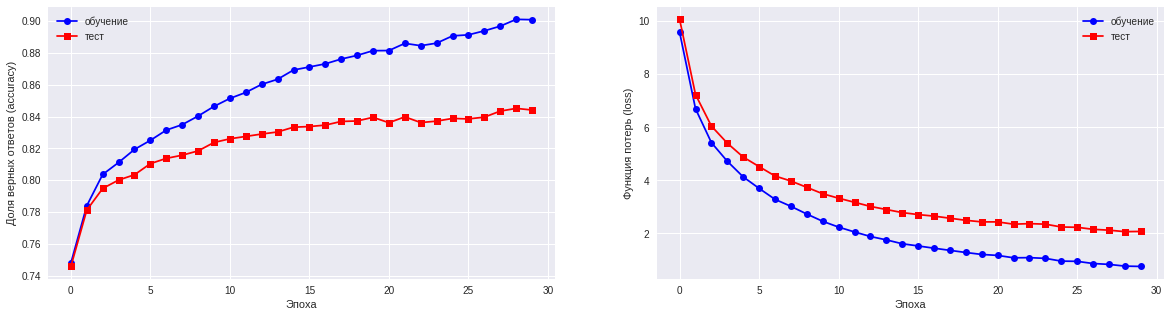

In [40]:
plot_results(accuracy_train, accuracy_test, loss_train, loss_test)

#### Keras

In [0]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256, input_shape=(input_shape,), activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(number_classes, activation='softmax'))

model._make_predict_function()

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [0]:
log = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_test, y_test))

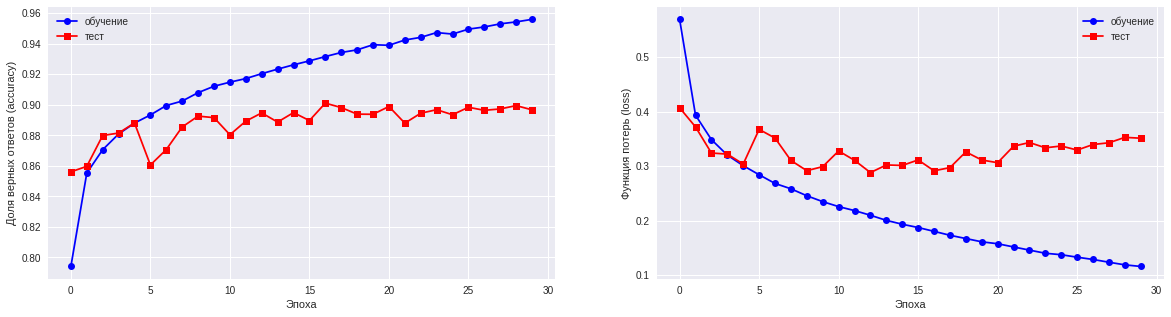

In [30]:
plot_results(log.history['acc'], log.history['val_acc'], log.history['loss'], log.history['val_loss'])

In [31]:
print('Итоговая доля верных ответов на тесте: {:.2f}%'.format(model.evaluate(x_test, y_test, verbose=0)[1]*100))

model.summary()

Итоговая доля верных ответов на тесте: 89.67%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


## Сверточная нейронная сеть

**В этой части задания необходимо реализовать сверточную нейронную сеть.**

**Рекомендуется начать с нескольких сверточных слоев, использовать слои суб-дискретизации, например MaxPooling. Необходимо оценить качество сети на тестовой выборке.**

**В заключение, рекомендуется увеличить количество слоев в нейронной сети и попробовать добавить слои BatchNormalization - они, как правило,  располагаются после сверточных слоев или слоев полносвязной нейронной сети. Обычно они улучшают качество, этим объясняется их популярность в современных архитектурах нейронных сетей.**

#### Tensorflow

**В начале  преобразуем `x_train` и `x_test` в форму, ожидаемую сверточной нейронной сетью (размер изображения 28х28, единица обозначает один цветовой канал):**

In [0]:
x_train_cnn = x_train.reshape(-1,28,28,1)
x_test_cnn = x_test.reshape(-1,28,28,1)

In [0]:
tf.reset_default_graph()
tf.random.set_random_seed(0)

X = tf.placeholder(dtype=tf.float32, shape=[None, 28,28,1])
y = tf.placeholder(dtype=tf.float32, shape=[None, number_classes])

In [0]:
# filter_size = 3
# input_channels = 1
# filters = 32
weights = {
    'w1': tf.Variable(tf.random_normal([3,3,1,32])),
    'w2': tf.Variable(tf.random_normal([3,3,32,64])),
    'w_fc': tf.Variable(tf.random_normal([7*7*64,64])),
    'out': tf.Variable(tf.random_normal([64, number_classes])),
}

biases = {
    'b1': tf.Variable(tf.random_normal([32])),
    'b2': tf.Variable(tf.random_normal([64])),
    'b_fc': tf.Variable(tf.random_normal([64])),
    'out': tf.Variable(tf.random_normal([number_classes])),
}

In [0]:
def conv_network(x, weights, biases):  

    # Convolution layer - pass input image x, weights w1 and bias b1 
    conv_1 = tf.nn.conv2d(x, weights['w1'], strides=[1, 1, 1, 1], padding='SAME')
    conv_1 = tf.nn.relu(conv_1 + biases['b1'])
    
    # Max Pooling layer (down-sampling) 
    pool_1 = tf.nn.max_pool(conv_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    conv_2 = tf.nn.conv2d(pool_1, weights['w2'], strides=[1, 1, 1, 1], padding='SAME')
    conv_2 = tf.nn.relu(conv_2 + biases['b2'])

    pool_2 = tf.nn.max_pool(conv_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Fully connected layer
    # Reshape pool_2 layer to fit fully connected layer input
    fc_shape = pool_2.get_shape().as_list()
    fc = tf.reshape(pool_2, [-1, fc_shape[1] * fc_shape[2] * fc_shape[3]]) # [-1, 7*7*64]

    fc = tf.add(tf.matmul(fc, weights['w_fc']), biases['b_fc'])
    fc = tf.nn.relu(fc)
    
    # Output layer 
    out = tf.add(tf.matmul(fc, weights['out']), biases['out'])
    
    return out

In [0]:
logits = conv_network(X, weights, biases)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y))

train_ = tf.train.AdamOptimizer().minimize(loss)

predictions = tf.nn.softmax(logits)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(predictions, axis=1), tf.argmax(y, axis=1)), dtype=tf.float32))

In [45]:
init = tf.global_variables_initializer()

loss_train, loss_test = [], []
accuracy_train, accuracy_test = [], []

with tf.Session() as s:
  
    s.run(init) 

    for epoch in range(epochs):
          
        for batch in range(number_objects // batch_size):
            x_batch, y_batch = x_train_cnn[batch*batch_size:(batch+1)*batch_size],\
            y_train[batch*batch_size:(batch+1)*batch_size]
            
             
            s.run(train_, feed_dict={X: x_batch, y: y_batch})
            
        # l_train, a_train = s.run([loss, accuracy], feed_dict={X: x_train_cnn, y: y_train})
        # loss_train.append(l_train)
        # accuracy_train.append(a_train)
    
        l_test, a_test = s.run([loss, accuracy], feed_dict={X: x_test_cnn, y: y_test})
        loss_test.append(l_test)
        accuracy_test.append(a_test)  
                
    print('Итоговая доля верных ответов на тесте: {:.2f}%'.format(s.run(accuracy, feed_dict={X: x_test_cnn, y: y_test})*100)) 

Итоговая доля верных ответов на тесте: 84.21%


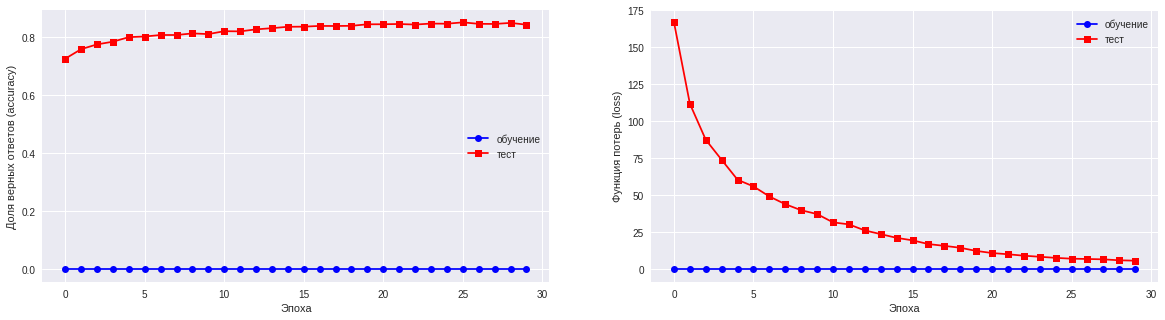

In [46]:
# при попытке посчитать loss и accuracy на обучающей выборке Google Colab падает с "Allocation of ... exceeds 10% of system memory."
plot_results(np.zeros(epochs), accuracy_test, np.zeros(epochs), loss_test)

#### Keras

In [0]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Convolution2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten()) # connection (transform from 2D array to 1D array) between the convolution and dense layers
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [0]:
log = model.fit(x_train_cnn, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_test_cnn, y_test))

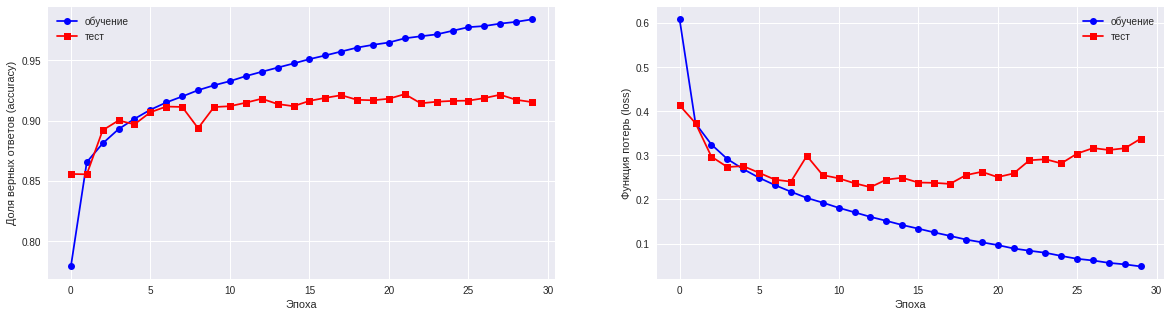

In [42]:
plot_results(log.history['acc'], log.history['val_acc'], log.history['loss'], log.history['val_loss'])

In [43]:
print('Итоговая доля верных ответов на тесте: {:.2f}%'.format(model.evaluate(x_test_cnn, y_test, verbose=0)[1]*100))

model.summary()

Итоговая доля верных ответов на тесте: 91.54%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (

**Усложним нейронную сеть, добавив дополнительные сверточные слои, `BatchNormalization` и также `Dropout` для уменьшения переобучения, которое наблюдалось в случае простой сверточной сети:**

In [47]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential()

model.add(tf.keras.layers.Convolution2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Convolution2D(filters=128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten()) # connection (transform from 2D array to 1D array) between convolution and dense layers

model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization()) # BN generally used between linear and non-linear layers
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [49]:
log = model.fit(x_train_cnn, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_test_cnn, y_test))

Instructions for updating:
Use tf.cast instead.


Итоговая доля верных ответов на тесте: 94.21%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (

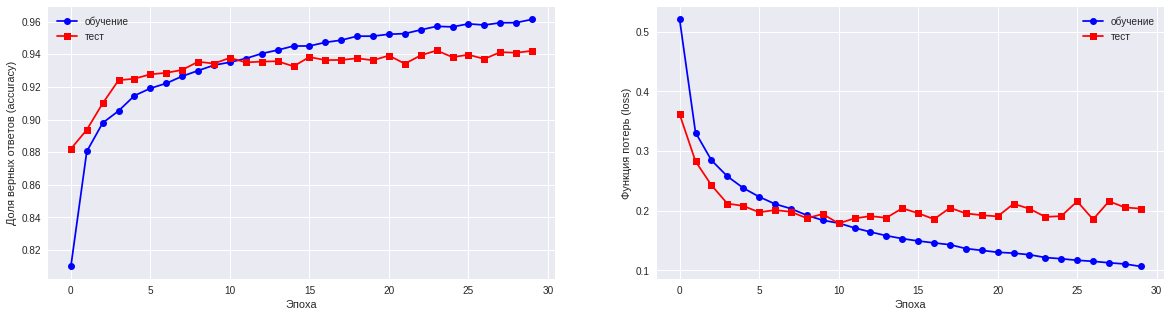

In [50]:
plot_results(log.history['acc'], log.history['val_acc'], log.history['loss'], log.history['val_loss'])

print('Итоговая доля верных ответов на тесте: {:.2f}%'.format(model.evaluate(x_test_cnn, y_test, verbose=0)[1]*100))

model.summary()

**Оценим качество предсказания итоговой нейронной сети:**

In [51]:
target_names = ['{}'.format(labels[i]) for i in range(number_classes)]
predictions = np.argmax(model.predict(x_test_cnn), axis=1)
test_labels = np.argmax(y_test, axis=1)

print(metrics.classification_report(test_labels, predictions, target_names=target_names))

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.92      0.90      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.94      0.90      0.92      1000
       Dress       0.94      0.95      0.95      1000
        Coat       0.91      0.93      0.92      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.84      0.81      0.82      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.97      0.98      0.97      1000

   micro avg       0.94      0.94      0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



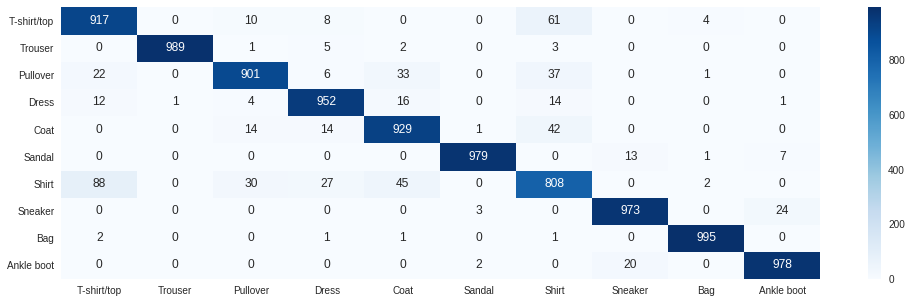

In [52]:
cm = metrics.confusion_matrix(test_labels, predictions)

fig, ax = plt.subplots(figsize=(17,5)) 
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, ax=ax)

Text(0.5, 1.0, 'Predicted: T-shirt/top\nClass: Shirt')

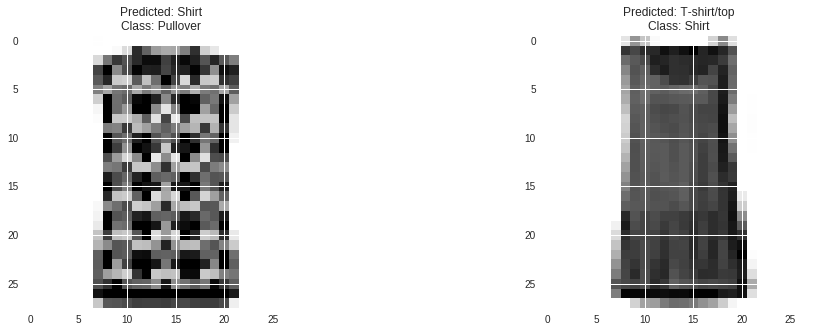

In [53]:
incorrect = np.where(test_labels != predictions)[0]

fig, axes = plt.subplots(ncols=2, figsize=(17, 5))

axes[0].imshow(x_test[incorrect[10]].reshape(28, 28))
axes[0].set_title('Predicted: {}\nClass: {}'.format(labels[predictions[incorrect[10]]], labels[test_labels[incorrect[10]]]))
axes[1].imshow(x_test[incorrect[20]].reshape(28, 28))
axes[1].set_title('Predicted: {}\nClass: {}'.format(labels[predictions[incorrect[20]]], labels[test_labels[incorrect[20]]]))

**Наконец, посмотрим какое качество классификации покажет простой алгоритм из scikit-learn вроде KNeighbors:**

In [51]:
model = neighbors.KNeighborsClassifier()

model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
print('Итоговая доля верных ответов на тесте с KNeighborsClassifier: {:.2f}%'.format(metrics.accuracy_score(y_test, model.predict(x_test))*100))

Итоговая доля верных ответов на тесте с KNeighborsClassifier: 84.49%


## Итоги
- **Метод ближайших соседей (KNeighbors) показывает качество классификации сравнимое с логистической регрессией, реализованной с помощью Keras**
- **Для реализации нейронных сетей с помощью Tensorflow был выбран оптимизатор `Adam`, потому что он работает гораздо лучше по сравнению с `Adadelta`, который был предложен в рамках проекта**
- **Качество классификации сверточных нейронных сетей ожидаемо лучше качества классификации полносвязных сетей (исключение для реализации Tensorflow, но там нужно большее количество эпох для обучения)**
- **Качество классификации итоговой нейронной сети достаточно высоко по сравнению с baseline (логистическая регрессия) и составляет около 94%, что обусловлено использованием множества сверточных слоев и `BatchNormalization`; наиболее часто сеть ошибается в категории Shirt**